# 손글씨 숫자 인식
- 8x8 픽셀 숫자 데이터 5620개 사용

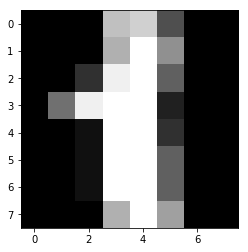

In [2]:
import cv2
import matplotlib.pyplot as plt
from sklearn import datasets
%matplotlib inline
digits = datasets.load_digits()
plt.imshow(digits.images[1], cmap="gray")
plt.show()

In [3]:
digits.data.shape

(1797, 64)

In [4]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [5]:
digits.images.shape

(1797, 8, 8)

In [6]:
# 각 픽셀은 0~15의 숫자로 표현된다, 크면 밝은 색
print(digits.images[0])

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


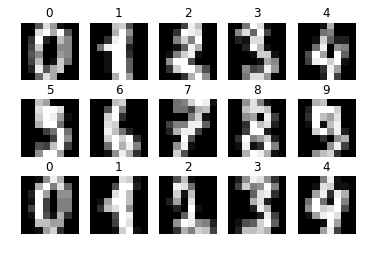

In [7]:
for i in range(15):
    plt.subplot(3, 5, i+1)
    plt.axis("off")
    plt.title(str(digits.target[i]))
    plt.imshow(digits.images[i], cmap="gray")

plt.show()

In [10]:
x = digits.images
x = x.reshape((-1, 64))

from sklearn.model_selection import train_test_split
from sklearn import datasets, svm, metrics
from sklearn.metrics import accuracy_score

y = digits.target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

clf = svm.LinearSVC()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(accuracy_score(y_test, y_pred))


In [12]:
# 학습한 데이터 저장하기
from sklearn.externals import joblib
joblib.dump(clf, 'digits.pkl')

['digits.pkl']

In [13]:
def predict_digit(filename):
  # 학습한 데이터 읽어 들이기
    model = joblib.load("digits.pkl")
    my_img = cv2.imread(filename)
    my_img = cv2.cvtColor(my_img, cv2.COLOR_BGR2GRAY)
    my_img = cv2.resize(my_img, (8, 8))
    my_img = 15 - my_img // 16 
    # 흑백 반전
    my_img = my_img.reshape((-1, 64))
    res = model.predict(my_img)
    return res[0]

digit2.png = 2


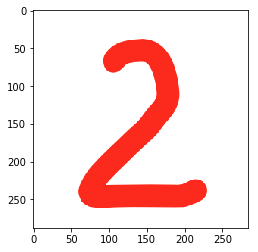

In [16]:
# 이미지 파일을 지정해서 실행하기
# 미리보기에서 클립보드에서 파일로 저장 실행
# 이미지 그리기도 미리보기에서 가능함
img = cv2.imread("digit2.png")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
n = predict_digit("digit2.png")
print("digit2.png = " + str(n))
plt.show()

digit9.png = 9


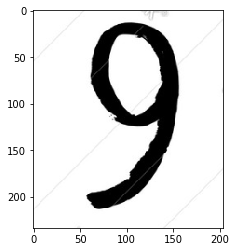

In [17]:
img = cv2.imread("digit9.png")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
n = predict_digit("digit9.png")
print("digit9.png = " + str(n))
plt.show()

digit9-2.png = 6


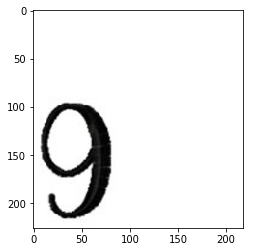

In [18]:
img = cv2.imread("digit9-2.png")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
n = predict_digit("digit9-2.png")
print("digit9-2.png = " + str(n))
plt.show()